### Persistent homology examples

* Ripser [paper](https://www.theoj.org/joss-papers/joss.00925/10.21105.joss.00925.pdf) [code](https://github.com/scikit-tda/ripser.py) (fast)
* Dionysus 2 [code](https://mrzv.org/software/dionysus2/) (representative examples)
* Nico's [code](https://github.com/nhchristianson/Math-text-semantic-networks)
* Ann's [code](https://github.com/asizemore/PH_tutorial/blob/master/Tutorial_day1.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

### Try persistent homology

In [2]:
import wiki

topic = 'biochemistry'
path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/full/'
network = wiki.Net()
network.load_graph(path_saved + topic + '.gexf')

In [3]:
%time network.barcodes

wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 11001/11251

### Plot

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

sns.set(style='whitegrid', font_scale=1.6)

In [5]:
def plot_barcodes(barcodes):
    """
    """
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
          for c in ['emerald green', 'tealish', 'peacock blue', 
                    'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(15,6))
    for i, row in barcodes.iterrows():
        birth = row['birth']
        death = row['death']
        x = [birth, 2050] if death==np.inf else\
            [birth, death]
        plt.plot(x, i*np.ones(len(x)), colors[row['dim']])
        if death != np.inf:
            plt.plot(death, i, 'r.')
    plt.axvline(x=2040, linestyle='--', color=mcd.XKCD_COLORS['xkcd:grey'])
    plt.gca().axes.yaxis.set_ticklabels([])

In [6]:
def plot_persistence_diagram(barcodes):
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
      for c in ['emerald green', 'tealish', 'peacock blue', 
                'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(10,10))
    for dim in set(barcodes['dim']):
        data = barcodes.loc[barcodes['dim']==dim]
        data.loc[data['death']==np.inf,'death'] = 2030
        plt.plot(data['birth'], data['death'], '.')
    x = [barcodes['birth'].min(),
         barcodes.loc[barcodes['death']!=np.inf,'death'].max()]
    print(x)
    plt.plot(x, [2030, 2030], '--')

CPU times: user 1min 12s, sys: 673 ms, total: 1min 13s
Wall time: 1min 17s


Text(0.5, 1.0, 'biochemistry')

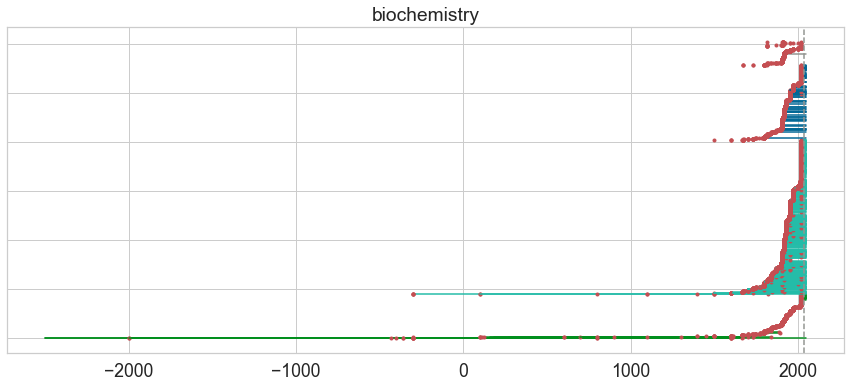

In [7]:
%time plot_barcodes(network.barcodes)
plt.title(topic)
# %time plot_persistence_diagram(barcodes.loc[barcodes['birth']>1900])

### Barcode statistics

In [8]:
births = {n: [0]*max(network.barcodes['dim']) for n in sorted(network.nodes)}
deaths = {n: [0]*max(network.barcodes['dim']) for n in sorted(network.nodes)}
for row in network.barcodes.iterrows():
    birth_nodes = row[1]['birth nodes']
    death_nodes = row[1]['death nodes']
    for node in birth_nodes:#set(birth_nodes)-set(death_nodes):
        births[node][row[1]['dim']-1] += 1
    for node in death_nodes:#set(death_nodes)-set(birth_nodes):
        deaths[node][row[1]['dim']-1] += 1

In [9]:
counts = {'names': list(range(len(network.nodes)))*2,
          'type': ['births']*len(network.nodes) + ['deaths']*len(network.nodes),
          'value': [sum(births[n]) for n in network.nodes] +\
                   [sum(deaths[n]) for n in network.nodes]}

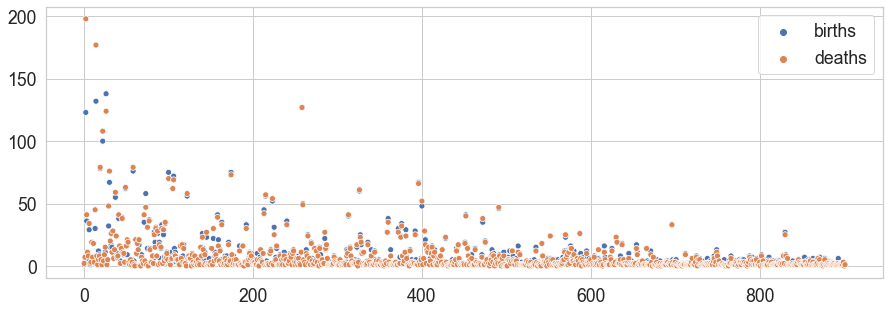

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='names', y='value', hue='type', data=counts)

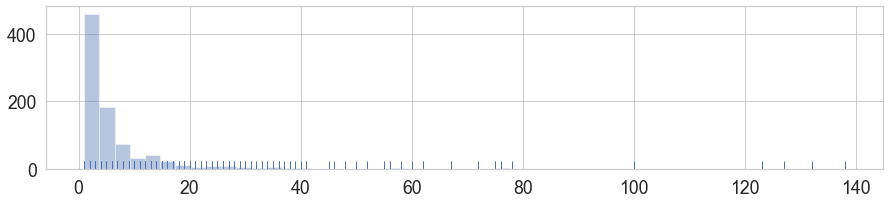

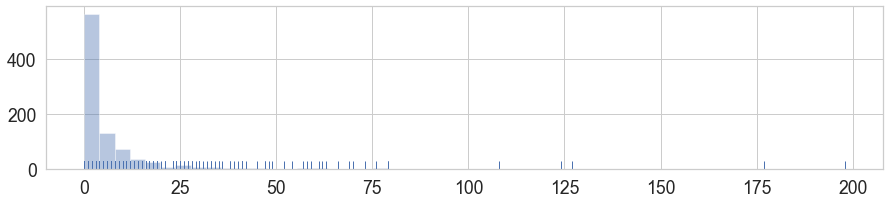

In [11]:
plt.figure(figsize=(15,3))
sns.distplot([sum(x) for x in births.values()], kde=False, rug=True)
plt.figure(figsize=(15,3))
sns.distplot([sum(x) for x in deaths.values()], kde=False, rug=True)

Text(0, 0.5, 'P(number of cavities)')

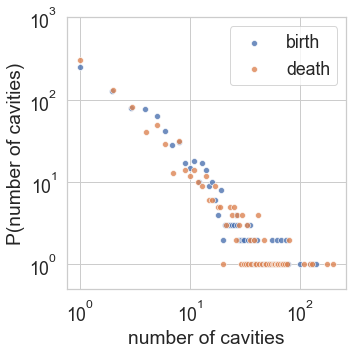

In [22]:
fig = plt.figure(figsize=(5,5))
hist, edges = np.histogram([sum(x) for x in births.values()], 1000)
ax = sns.scatterplot('x', 'y', data={'x': edges[:-1],
                                     'y': hist}, alpha=0.8)
hist, edges = np.histogram([sum(x) for x in deaths.values()], 1000)
sns.scatterplot('x', 'y', data={'x': edges[:-1],
                                'y': hist}, alpha=0.8)
ax.set_yscale('log')
ax.set_ylim([.5,1000])
ax.set_xscale('log')
ax.set_ylim([.5,1000])
ax.legend(['birth', 'death'])
ax.set_xlabel('number of cavities')
ax.set_ylabel('P(number of cavities)')

In [21]:
[n for n, o in births.items() if sum(o)>70]

['Archaea',
 'Atomic nucleus',
 'Carbohydrate',
 'Chemical compound',
 'Chemical formula',
 'Covalent bond',
 'Dna',
 'Eukaryote',
 'Organism',
 'Water']

In [20]:
[n for n, o in deaths.items() if sum(o)>70]

['Archaea',
 'Atomic nucleus',
 'Biomolecule',
 'Carbohydrate',
 'Chemical compound',
 'Dna',
 'Eukaryote',
 'Organism',
 'Water']

In [19]:
[n for n in network.graph.nodes if len(network.graph[n])>40]

['Chemistry',
 'Molecule',
 'Organism',
 'Eukaryote',
 'Gene',
 'Dna',
 'Protein',
 'Amino acid',
 'Cell (biology)',
 'Enzyme',
 'Biochemistry',
 'Cell membrane']

In [24]:
# [n for n in network.graph.nodes if ]
deaths['Chemistry']

[3, 0, 0, 0, 0, 4]

Text(0, 0.5, 'P(lifetime)')

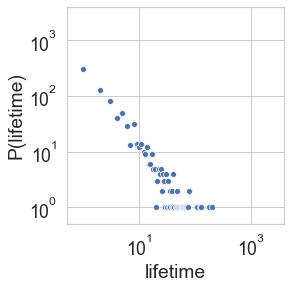

In [18]:
lifetimes = np.array(network.barcodes['death']-network.barcodes['birth'])
lifetimes[lifetimes >= 1E308] = 0
hist, edges = np.histogram([sum(lifetimes)
                            for lifetimes in deaths.values()], 1000)
ax = sns.scatterplot('x', 'y', data={'x': edges[:-1],
                                     'y': hist})
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(.5,4000)
ax.set_ylim(.5,4000)
ax.set_aspect('equal', 'box')
ax.set_xlabel('lifetime')
ax.set_ylabel('P(lifetime)')